<a href="https://colab.research.google.com/github/sgaut023/kymatio_mod/blob/master/parametricSN/notebooks/FilterParamsEffectColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of the Effect of Wavelet Filters

### This notebook visualizes the effect of the four parameters used to create the Morlet wavelet filters, which are described in the following table.
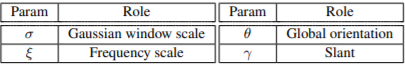
### Instructions: run all the cells sequentially and interact if you wish with the sliders on the last cell.

In [ ]:
!git clone https://github.com/sgaut023/kymatio_mod 

In [ ]:
import sys
import os
from pathlib import Path 
sys.path.append(str(os.path.join(Path.cwd(),"kymatio_mod")))
import numpy as np
from kymatio.scattering2d.core.scattering2d import scattering2d
import matplotlib.pyplot as plt
import torch
from kymatio import Scattering2D
from parametricSN.models.create_filters import *

In [ ]:
def create_filter(theta,slant,xi,sigma):
    n_filters = 1
    device = None

    orientations = np.array([theta]) 
    slants = np.array([slant])
    xis = np.array([xi])
    sigmas = np.array([sigma])

    xis = torch.tensor(xis, dtype=torch.float32, device=device)
    sigmas = torch.tensor(sigmas, dtype=torch.float32, device=device)
    slants = torch.tensor(slants, dtype=torch.float32, device=device)
    orientations = torch.tensor(orientations, dtype=torch.float32, device=device)  

    shape = (32, 32,)
    ranges = [torch.arange(-(s // 2), -(s // 2) + s, device=device, dtype=torch.float) for s in shape]
    grid = torch.stack(torch.meshgrid(*ranges), 0)
    wavelet = morlets(grid, orientations, xis, sigmas, slants, device=device)
    
    return wavelet

def visualizeFiltersDynamic(offsettheta=0.0,
                               offsetslant=0.0,
                               offsetxi=0.0,
                               offsetsigma=0.0,
                               ):
    f, axarr = plt.subplots(6,3,figsize=(4, 8))
    names = ['Ref','Theta','Slant','Xi','Sigma',"All"]
    modes = ['fourier','real', 'imag']
    j=1
    
    theta=np.pi/2
    slant=0.5
    xi= 3.0 / 4.0 * np.pi /2**(1)
    sigma=0.8 * 2**(1)
    for i,name in enumerate(names):
        if i==0:
            wavelet = create_filter(theta,slant,xi,sigma) 
        elif i==1:
            wavelet = create_filter(theta+offsettheta,slant,xi,sigma)
        elif i==2:
            wavelet = create_filter(theta,slant+offsetslant,xi,sigma)
        elif i==3:
            wavelet = create_filter(theta,slant,xi+offsetxi,sigma)
        elif i==4:
            wavelet = create_filter(theta,slant,xi,sigma+offsetsigma)
        elif i==5:
            wavelet = create_filter(theta+offsettheta,slant+offsetslant,xi+offsetxi,sigma+offsetsigma)    
            
        for j,mode in enumerate(modes):
            if mode == 'fourier':
                x =np.fft.fftshift(wavelet.squeeze().cpu().detach().numpy()).real
                if i==0:
                    axarr[i,j].set_title(f"Frequencies")
            elif mode == 'real':
                x= np.fft.fftshift(np.fft.ifft2(wavelet.squeeze().cpu().detach().numpy())).real
                if i==0:
                    axarr[i,j].set_title(f"Real part")
            elif mode == 'imag':
                x= np.fft.fftshift(np.fft.ifft2(wavelet.squeeze().cpu().detach().numpy())).imag
                if i==0:
                    axarr[i,j].set_title(f"Imaginary part")
            else:
                raise NotImplemented(f"Model {params['name']} not implemented")

            a=np.abs(x).max()
            axarr[i,j].imshow(x, vmin=-a, vmax=a)
            axarr[i,j].set_xticklabels([])
            axarr[i,j].set_yticklabels([])
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_aspect('equal')

    for idx,ax in enumerate(axarr[:,0].flat):
        ax.set(ylabel=names[idx])

    f.tight_layout()
    
def visualizeFiltersRef(offset,filename="",save=False):
    f, axarr = plt.subplots(5,3,figsize=(5, 8))
    names = ['Ref','Theta offset','Slant offset','Xi offset','Sigma offset']
    modes = ['fourier','real', 'imag']
    j=1
    offset = offset
    theta = np.pi/2
    slant = 0.5
    xi = 3.0 / 4.0 * np.pi /2**j
    sigma = 0.8 * 2**j
    for i,name in enumerate(names):
        if i == 0:
            wavelet = create_filter(theta,slant,xi,sigma)
        elif i==1:
            wavelet = create_filter(theta+offset,slant,xi,sigma)
        elif i==2:
            wavelet = create_filter(theta,slant+offset,xi,sigma)
        elif i==3:
            wavelet = create_filter(theta,slant,xi+offset,sigma)
        elif i==4:
            wavelet = create_filter(theta,slant,xi,sigma+offset)
        for j,mode in enumerate(modes):
            if mode =='fourier':
                x =np.fft.fftshift(wavelet.squeeze().cpu().detach().numpy()).real
                if i==0:
                    axarr[i,j].set_title(f"Frequencies")
            elif mode == 'real':
                x= np.fft.fftshift(np.fft.ifft2(wavelet.squeeze().cpu().detach().numpy())).real
                if i==0:
                    axarr[i,j].set_title(f"Real part")
            elif mode == 'imag':
                x= np.fft.fftshift(np.fft.ifft2(wavelet.squeeze().cpu().detach().numpy())).imag
                if i==0:
                    axarr[i,j].set_title(f"Imaginary part")
            else:
                raise NotImplemented(f"Model {params['name']} not implemented")

            a=np.abs(x).max()
            axarr[i,j].imshow(x, vmin=-a, vmax=a)
            axarr[i,j].set_xticklabels([])
            axarr[i,j].set_yticklabels([])
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_aspect('equal')

    for idx,ax in enumerate(axarr[:,0].flat):
        ax.set(ylabel=names[idx])

    f.tight_layout()
    if save:
        if filename == '':
            print("no filename specified")
            raise Exception
            
        f.savefig(filename)

In [ ]:
%matplotlib inline
visualizeFiltersRef(offset=0.75,filename="",save=False)

In [ ]:
# Code from https://stackoverflow.com/questions/52859983/interactive-matplotlib-figures-in-google-colab/55435199#55435199

import datetime
from datetime import date
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


cf.go_offline()
init_notebook_mode(connected=False)
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

### The figure below is interactive. You can change the value of the four different parameters and observe the effect. The visualization presents the wavelet in the frequency domain, the real part and the imaginary part. Ref stands for a reference filter. The four following rows present a change in only one parameter, which can be modified by its offset slider. The last row is a combination of all the changes of the parameters.

In [ ]:
configure_plotly_browser_state()

from ipywidgets import interact
import ipywidgets as widgets
j=1
interact(visualizeFiltersDynamic,offsettheta=(-1.0,1.0),
                               offsetslant=(-0.25,0.25),
                               offsetxi=(-0.5,0.5),
                               offsetsigma=(-0.5,0.5),
                               )